In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

The Beta distribution is <i>a continuous probability distribution</i>. Its' domain is bounded between 0 and 1<br>
This distribution can be used to model the probabilities in different scenarious. It can take various shapes, depending on the values of the parameters<br>
The Beta distribution can take the the data about successfull and unsuccessfull attempts, and the it returns the probability

##### Materials
- [Beta Calculator](https://homepage.divms.uiowa.edu/~mbognar/applets/beta.html)
- [Beta Distribution — Intuition, Examples, and Derivation](https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af)
- [Beta Distribution Simply Explained](https://towardsdatascience.com/beta-distribution-simply-explained-839b3acde6e9)
- [When to use Binomial versus Beta distribution?](https://gr33ndata.medium.com/when-to-use-binomial-versus-beta-distribution-8fd4a68c99bf)


## PDF - Probability Density Function
> PDF is used to describe the continuous probability distributions

#### Formula

#### $f(x, a, b)=\frac{x^{a-1}(1-x)^{b-1}}{Beta(a,b)}=\frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)}$
> for a > 0, b > 0 where $\Gamma$ is [the gamma function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html#scipy.special.gamma)
- 1/Beta(a,b) is a normalizing coefficient, ensuring that the function integrates to 1
> $Beta(a,b)=\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$, where $\Gamma(a)=(a-1)!$
- <i>The numerator is intuitively close to Binominal Distribution</i>.<br>The only difference is the probability, which is a parameter for the Binominal Distribution while it is a random variable for Beta Distribution.
> $Beta \space Distribution's \space PDF = x^{a-1}(1-x)^{b-1}$<br>
> $Binominal \space PDF = \begin{pmatrix}n\cr x\cr\end{pmatrix}p^x(1-p)^{n-x}$
    - For the Beta distribution the probability is a random variable which we are trying to estimate.
    - For the Binomial distribution the probability is a fixed parameter which we use to infer the probability of n successes.

#### Parameters
- $\alpha$ - represents the number of successes, akin to the `n` term in the binomial distribution.
- $\beta$ - represents the number of failures, similar to the `n - x` term in the binomial distribution.

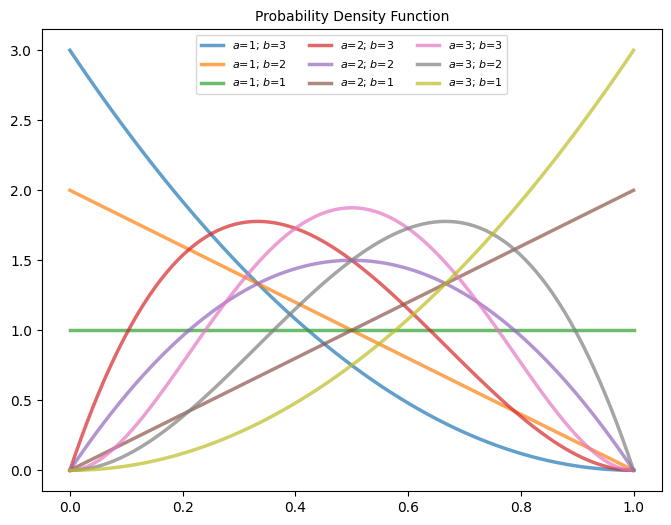

In [121]:
plt.figure(figsize=(8, 6))

a_range = range(1, 4)
b_range = range(3, 0, -1)

for a in a_range:
    for b in b_range:
        plt.plot(x, 
                 stats.beta.pdf(x, a, b),
                 lw=2.5,
                 alpha=.7,
                 label=f'$a$={a}; $b$={b}')

plt.title('Probability Density Function', fontsize=10)
plt.legend(fontsize=8, ncols=3);

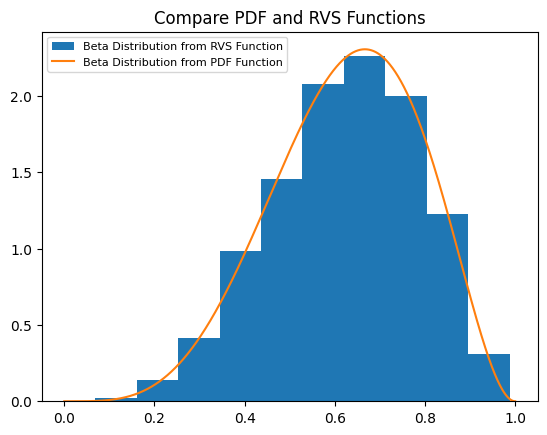

In [427]:
n = 10000
a = 5
b = 3

probability_range = np.linspace(0,1,n)

plt.hist(stats.beta.rvs(a=a, b=b, size=n), density=True, label='Beta Distribution from RVS Function')
plt.plot(probability_range, stats.beta.pdf(x=probability_range, a=a, b=b), label='Beta Distribution from PDF Function')
plt.title('Compare PDF and RVS Functions')
plt.legend(fontsize=8)
plt.show();

In [433]:
beta_stats_moments = stats.beta.stats(a=a, b=b, moments='mvsk')
print(f'Median: {round(beta_stats_moments[0], 3)}')
print(f'Variance: {round(beta_stats_moments[1], 3)}')
print(f'Skew: {round(beta_stats_moments[2], 3)}')
print(f'Kurtosis: {round(beta_stats_moments[3], 3)}')

Median: 0.625
Variance: 0.026
Skew: -0.31
Kurtosis: -0.415



## PPF - Percent Point Function
- Inverse of $cdf$
- Returns a data point from a declared percentile

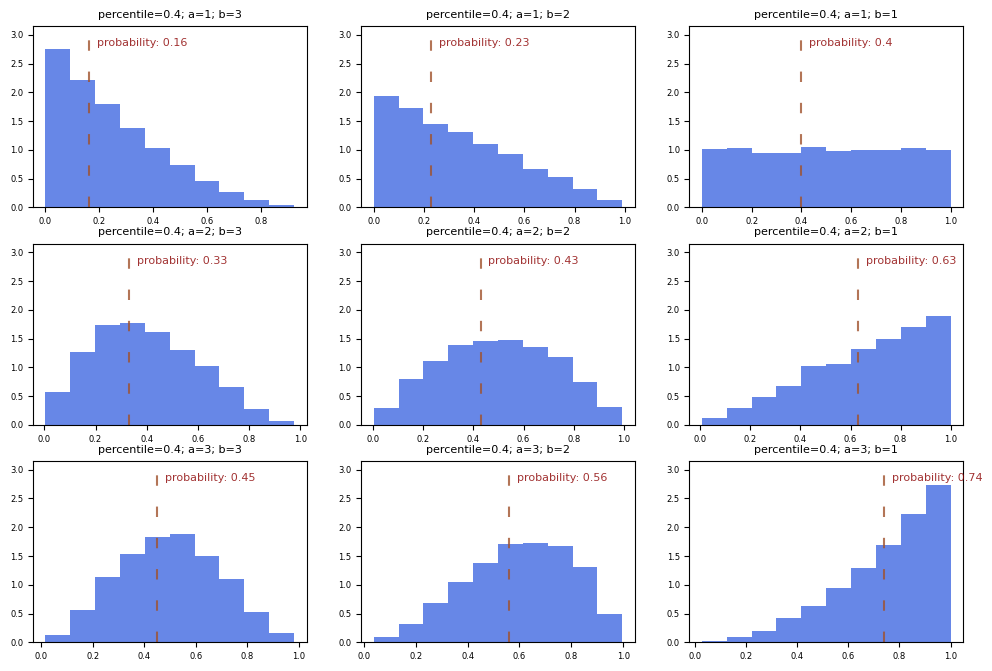

In [437]:
n = 10000
a_range = range(1, 4)
b_range = range(3, 0, -1)

# percentile value
percentile_value = .4

fig, axs = plt.subplots(3, 3, figsize=(12, 8)) 
for index_a, a in enumerate(a_range):
    for index_b, b in enumerate(b_range):
        prob_value = round(stats.beta.ppf(q=percentile_value, a=a, b=b), 2)

        axs[index_a, index_b].hist(stats.beta.rvs(a=a, b=b, size=n), density=True, color='royalblue', alpha=.8)
        axs[index_a, index_b].set_title(f'percentile={percentile_value}; a={a}; b={b}', fontsize=8)
        axs[index_a, index_b].tick_params(labelsize=6)
        axs[index_a, index_b].vlines(prob_value, 0, 3, color='sienna', alpha=.8, linestyle=(0, (5, 10)))
        axs[index_a, index_b].annotate(f'probability: {prob_value}', xy=(prob_value+0.03, 2.8), color='darkred', alpha=.8, fontsize=8)

plt.show();


## CDF - Cumulative Density Function
- Inverse of $ppf$
- Returns a percentile from a declared data point


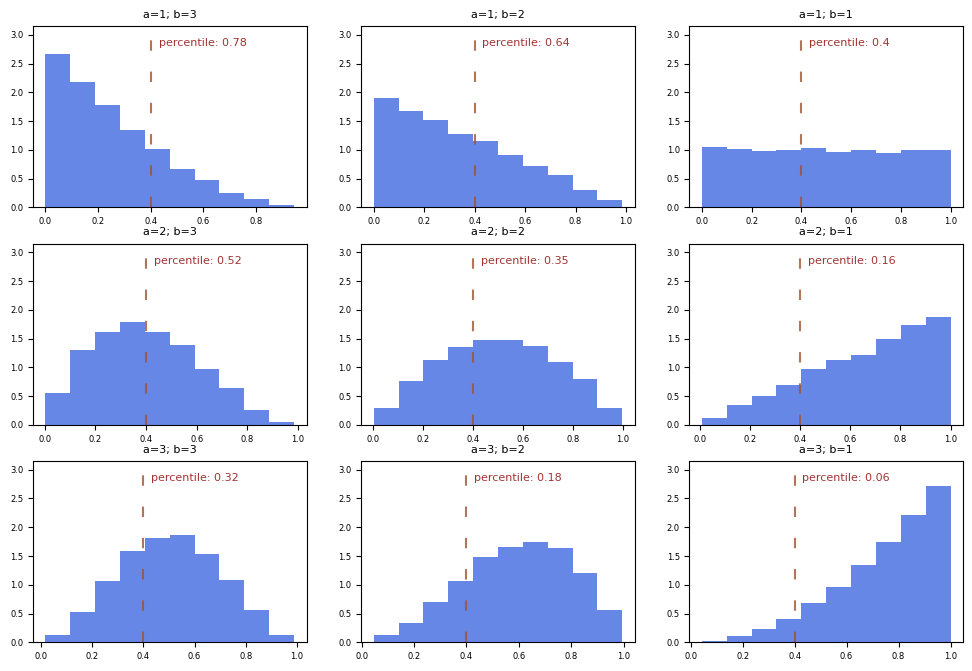

In [392]:
n = 10000
a_range = range(1, 4)
b_range = range(3, 0, -1)

# probability data point
prob_value = .4

fig, axs = plt.subplots(3, 3, figsize=(12, 8)) 
for index_a, a in enumerate(a_range):
    for index_b, b in enumerate(b_range):
        percentile_value = round(stats.beta.cdf(x=prob_value, a=a, b=b), 2)

        axs[index_a, index_b].hist(stats.beta.rvs(a=a, b=b, size=n), density=True, color='royalblue', alpha=.8)
        axs[index_a, index_b].set_title(f'a={a}; b={b}', fontsize=8)
        axs[index_a, index_b].tick_params(labelsize=6)
        axs[index_a, index_b].vlines(prob_value, 0, 3, color='sienna', alpha=.8, linestyle=(0, (5, 10)))
        axs[index_a, index_b].annotate(f'percentile: {percentile_value}', xy=(prob_value+0.03, 2.8), color='darkred', alpha=.8, fontsize=8)

plt.show();